<a href="https://colab.research.google.com/github/Avijit-Giri/DS_Project/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir-p ~/.kaggle
!cp kaggle.json ~/.kaggle/

/bin/bash: line 1: mkdir-p: command not found
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 18.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(

directory = '/content/train',

labels='inferred',

label_mode = 'int',

batch_size=32,

image_size=(256,256)

)


validation_ds = keras.utils.image_dataset_from_directory(

directory = '/content/test',

labels='inferred',

label_mode = 'int',

batch_size=32,

image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):

    image = tf.cast(image/255.,tf.float32)

    return image, label

train_ds = train_ds.map(process)

validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()



model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model .add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))



model.add(Flatten())


model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.9184 - loss: 0.1909 - val_accuracy: 0.8048 - val_loss: 0.6971
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9370 - loss: 0.1534 - val_accuracy: 0.7918 - val_loss: 0.6800
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.9435 - loss: 0.1407 - val_accuracy: 0.8366 - val_loss: 0.6543
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9496 - loss: 0.1281 - val_accuracy: 0.7116 - val_loss: 1.4141
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 94ms/step - accuracy: 0.9578 - loss: 0.1074 - val_accuracy: 0.8252 - val_loss: 0.7078
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 97ms/step - accuracy: 0.9616 - loss: 0.1046 - val_accuracy: 0.8232 - val_loss: 0.6272
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 121ms/step - accuracy: 0.9621 - loss: 0.1020 - val_accuracy: 0.8042 - val_loss: 0.7392
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 110ms/step - accuracy: 0.9614 - loss: 0.1021 

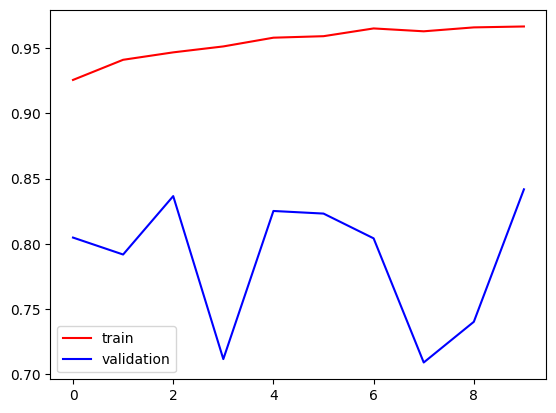

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')

plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.legend()

plt.show()

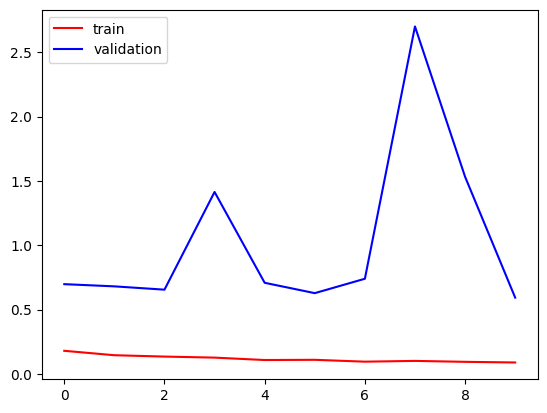

In [ ]:
plt.plot(history.history['loss'],color='red', label='train')

plt.plot(history.history['val_loss'],color='blue', label='validation')

plt.legend()

plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog image.webp')

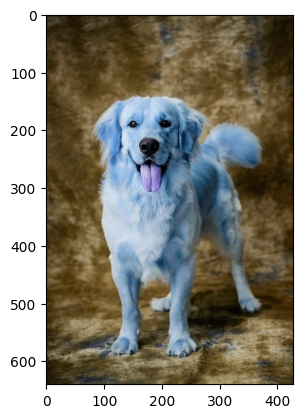

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.82664645]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/cat(1) image.jpeg')

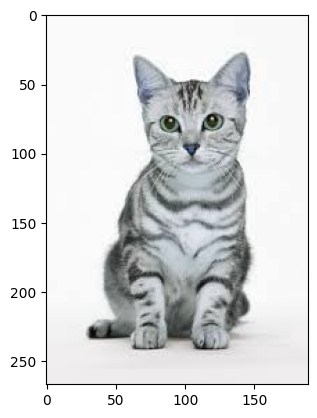

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)